# Feature Engineering and Data Processing

- import of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- loading of dataset

In [2]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")       # relative path of dataset

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Method 1 : Handling Missing Data

##### Step 1 : Analyzing Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
missing_values = df.isnull().sum()       # add the number of null values for a particular column
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)      # sort the number of missing values column wise into descending order
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [8]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [9]:
import missingno as msno

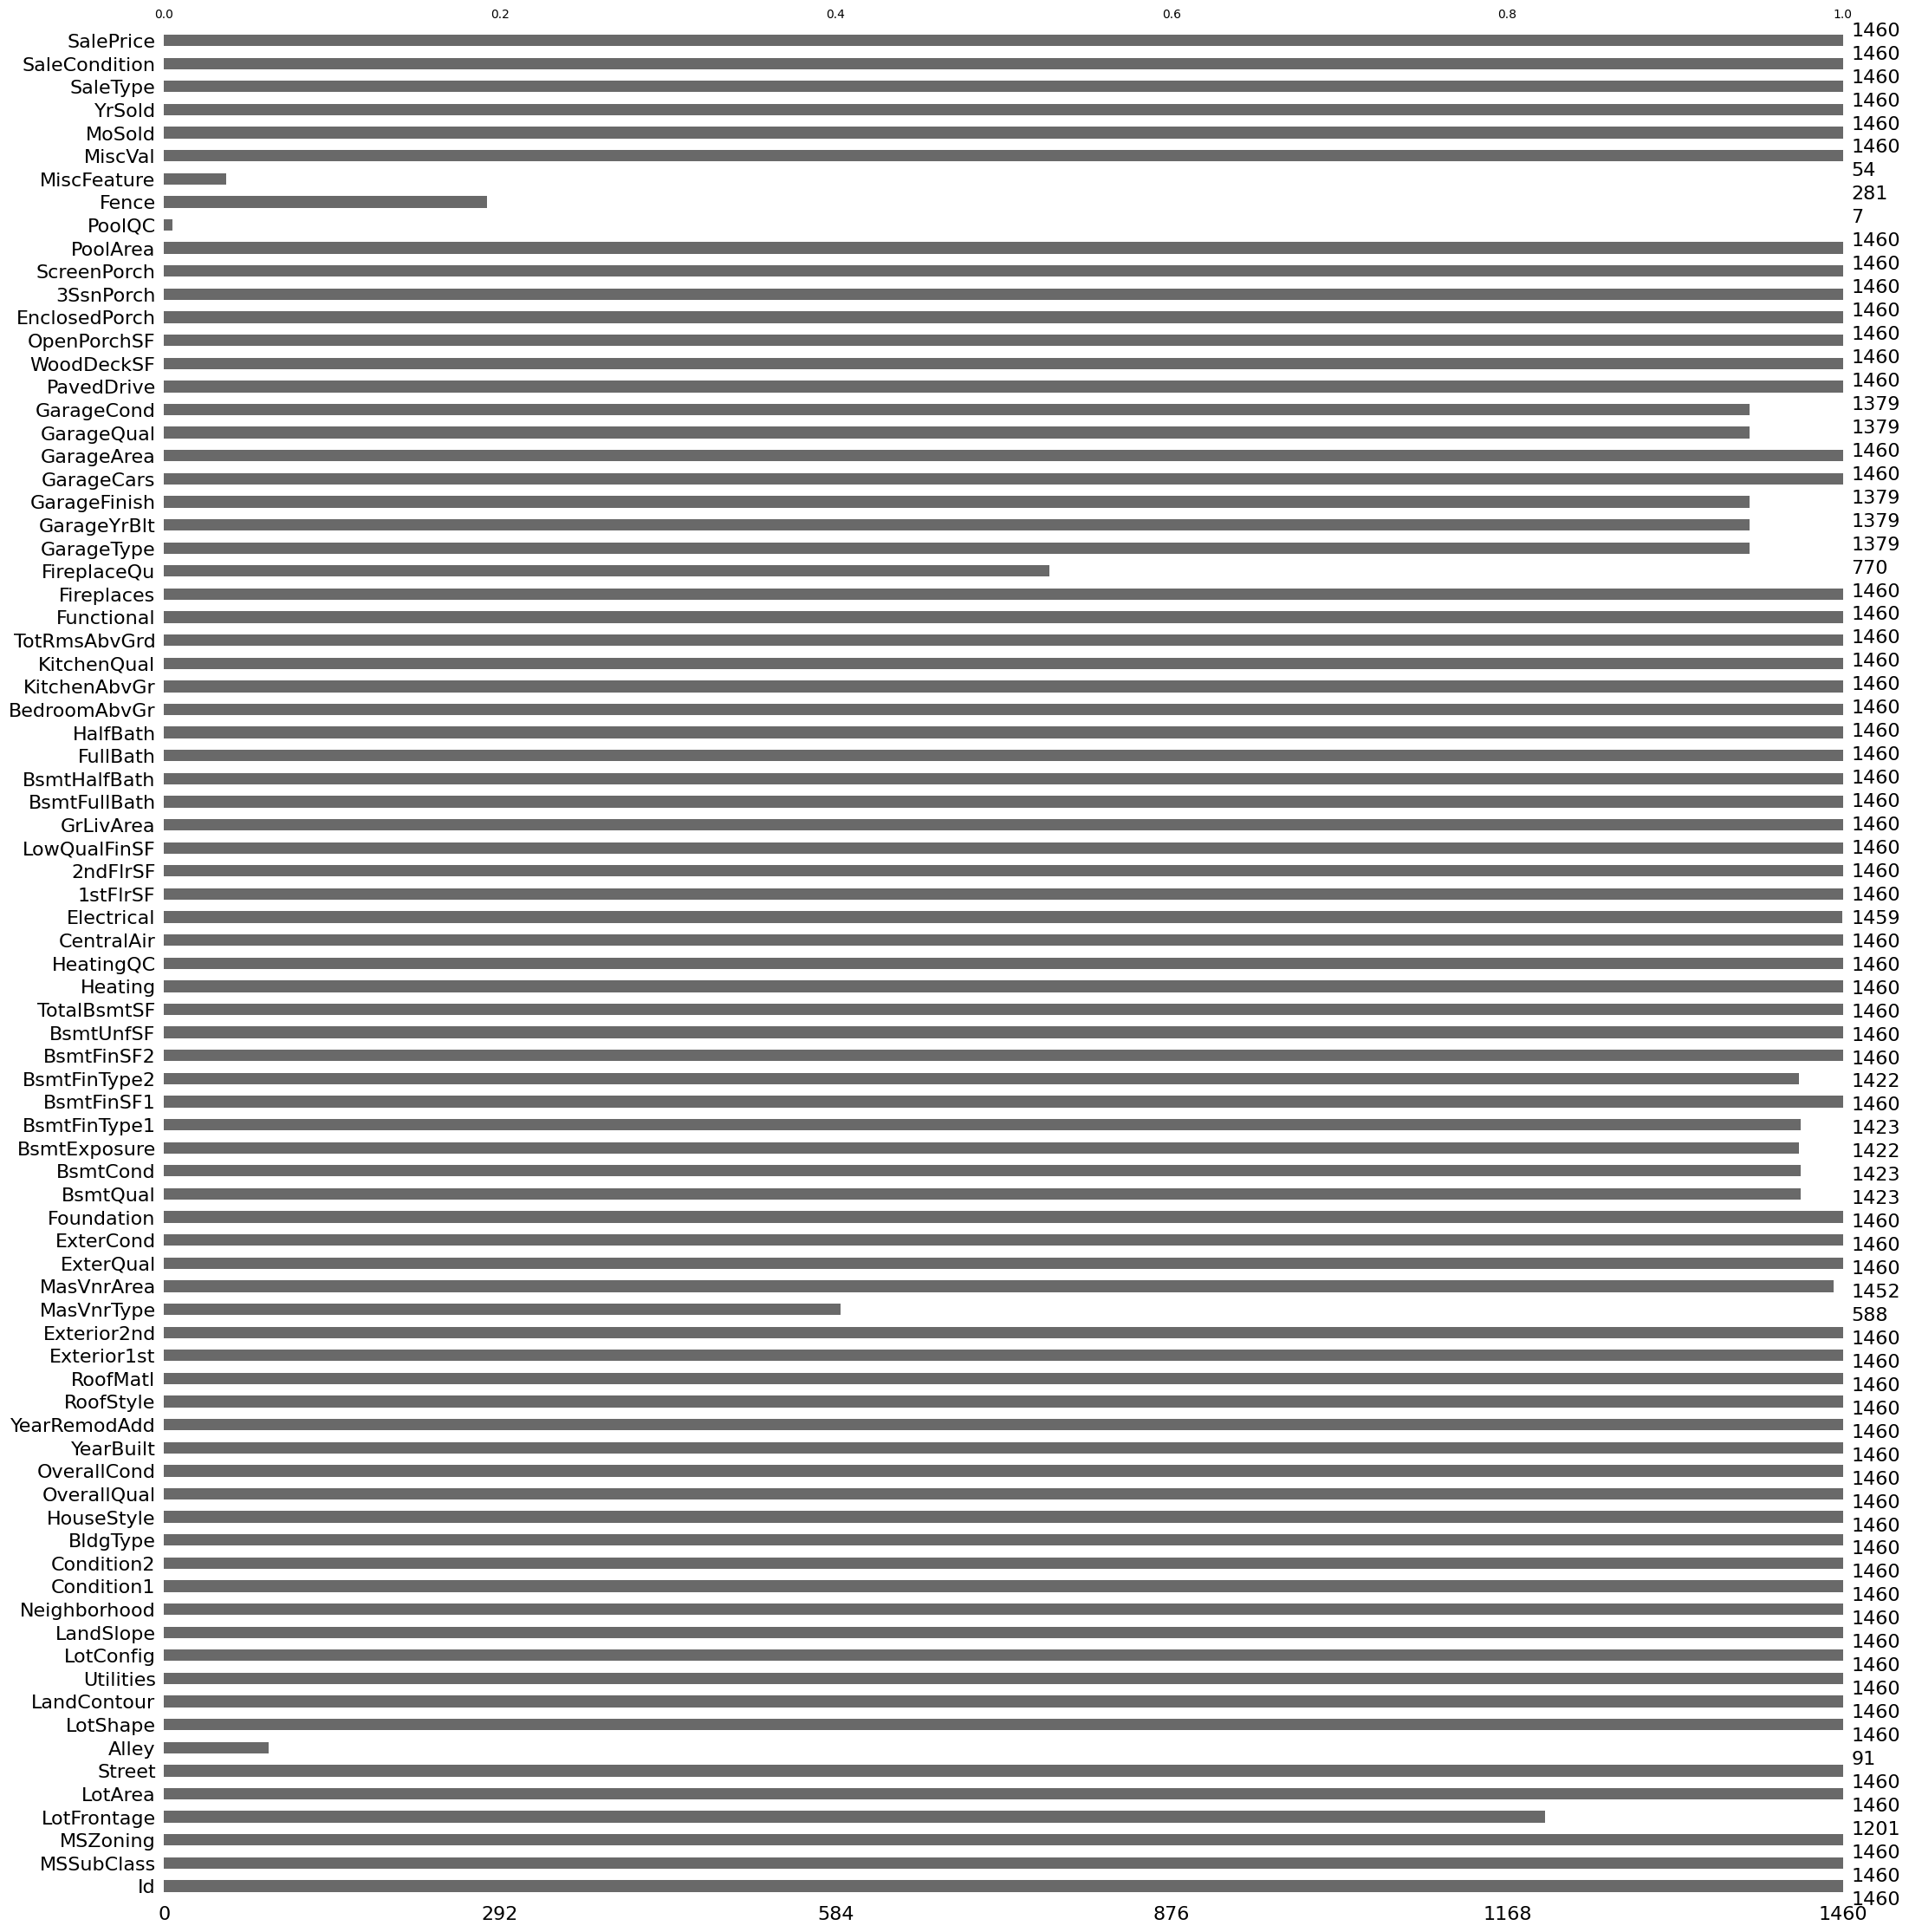

In [10]:
# visual way to find availability of missing value

plt.figure(figsize=(12,6))
msno.bar(df)
plt.show()

# shows how much data is missing column wise
# long bars --> complete data
# short bars --> lots of missing values

<function matplotlib.pyplot.show(close=None, block=None)>

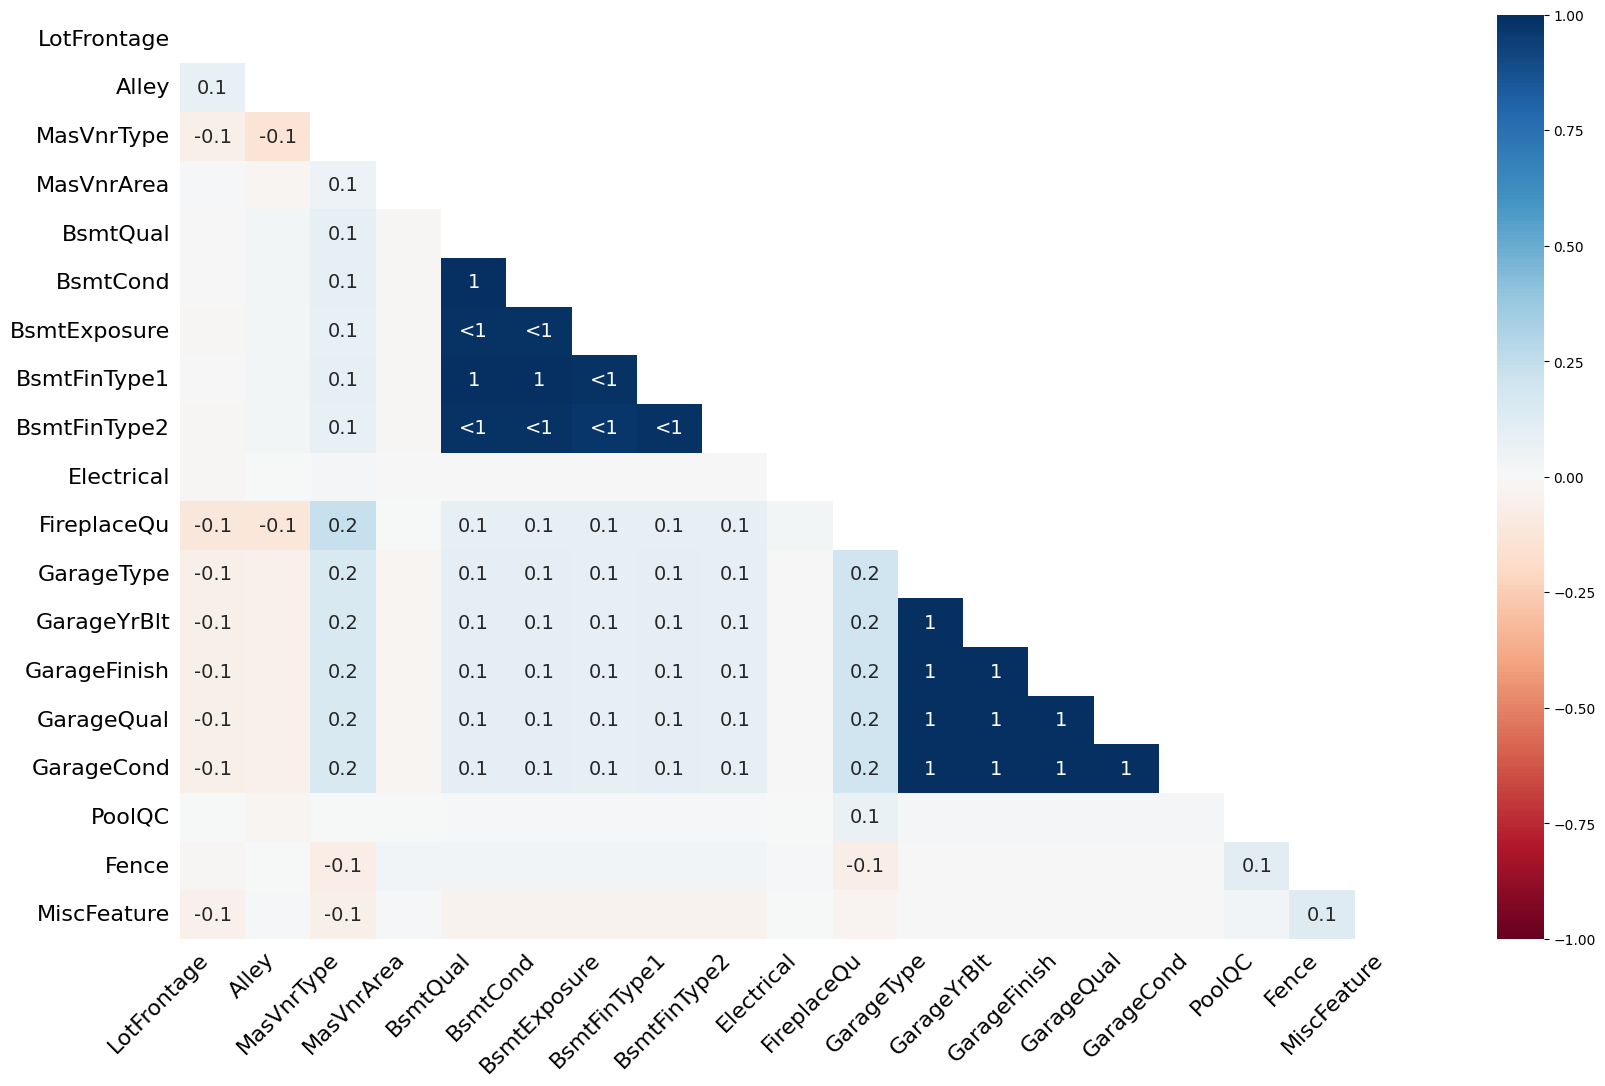

In [11]:
plt.Figure(figsize=(12,6))
msno.heatmap(df)
plt.show

# values close to 1 --> two columns tends to be missing together
# values close to 0 --> no relationship
# values negative -->  when one is missing , the other is usually present.

##### Step 2 : Deletion Method

THEORY ---> deletion will delete all the rows which have missing data.

In [12]:
# listwise deletion (case deletion)
df_listwise = df.dropna()
print("original shape :", df.shape)
print("After listwise deletion shape :", df_listwise.shape)

original shape : (1460, 81)
After listwise deletion shape : (0, 81)


After listwise deletion it gives 0 rows means that every row contain alteast 1 missing value so it is deleted.

##### Step 3 : Simple Imputation

THEORY ---> Instead of deleting we fill missing values with estimates.

In [13]:
# function to check before and after of imputation

def compare_imputation(df_before, df_after, column_name):
    missing_indices = {column_name : df_before[df_before[column_name].isnull()].index.to_list() for column_name in df_before.columns if df_before[column_name].isnull().any()}

    if column_name not in missing_indices:
        print(f"No missing values found in column '{column_name}'")
        return
    
    idx_list = missing_indices[column_name]

    comparison = pd.DataFrame({
                    "Before" : df_before.loc[idx_list, column_name],
                    "After" : df_after.loc[idx_list, column_name],
                })

    print(f"Changes in column : {column_name}")
    return comparison


In [14]:
# (a) Mean imputation (numerical data)

df_mean = df.copy()
# df_mean['LotFrontage'].fillna(df_mean['LotFrontage'].mean(), inplace=True)


In [15]:
df_mean.fillna({'LotFrontage': df_mean['LotFrontage'].mean()}, inplace=True)

In [16]:
compare_imputation(df, df_mean, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,70.049958
12,NaN,70.049958
14,NaN,70.049958
16,NaN,70.049958
24,NaN,70.049958
31,NaN,70.049958
42,NaN,70.049958
43,NaN,70.049958
50,NaN,70.049958
64,NaN,70.049958


Issues with using mean :
1. It will pull the distribution towards mean
2. underestimate spread

In [17]:
# (b) Median imputation (numerical data)

df_median = df.copy()
df_median.fillna({'LotFrontage': df_median['LotFrontage'].median()}, inplace=True)

In [18]:
compare_imputation(df, df_median, "LotFrontage").head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,69.0
12,NaN,69.0
14,NaN,69.0
16,NaN,69.0
24,NaN,69.0
31,NaN,69.0
42,NaN,69.0
43,NaN,69.0
50,NaN,69.0
64,NaN,69.0


In [19]:
# (b) Mode imputation (categorical data)

df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [20]:
df_mode = df.copy()
df_mode.fillna({'GarageType': df_mode['GarageType'].mode()[0]}, inplace=True)

In [21]:
compare_imputation(df, df_mode, "GarageType").head(10)

Changes in column : GarageType


,Before,After
39,NaN,Attchd
48,NaN,Attchd
78,NaN,Attchd
88,NaN,Attchd
89,NaN,Attchd
99,NaN,Attchd
108,NaN,Attchd
125,NaN,Attchd
127,NaN,Attchd
140,NaN,Attchd


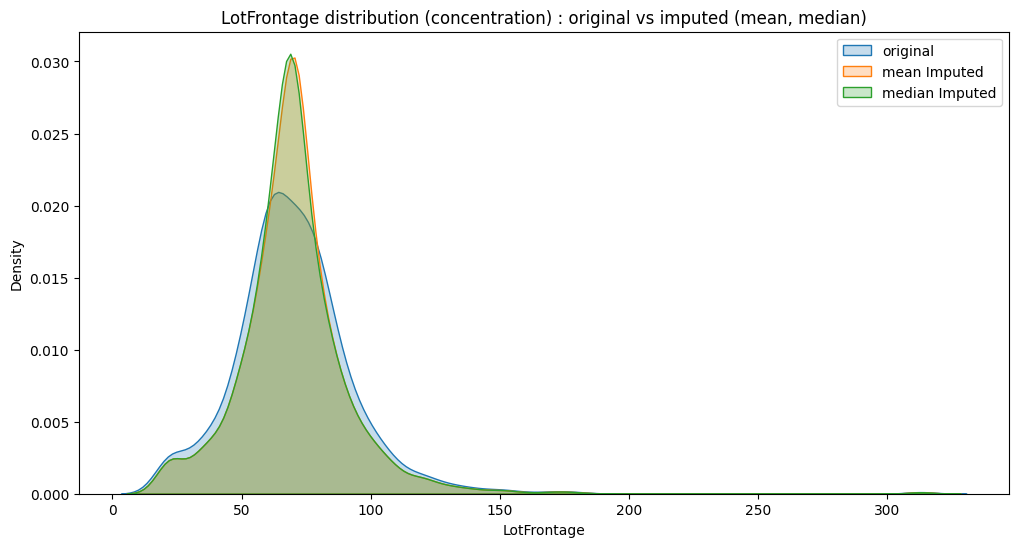

In [22]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['LotFrontage'], label = "original", fill=True)
sns.kdeplot(df_mean['LotFrontage'], label = "mean Imputed", fill=True)
sns.kdeplot(df_median['LotFrontage'], label = "median Imputed", fill=True)
plt.legend()
plt.title("LotFrontage distribution (concentration) : original vs imputed (mean, median)")
plt.show()


##### Step 4 : KNN Imputation

- For this imputation we have to install scikit-learn library.

In [23]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.0 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.0 MB 876.0 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.0 MB 876.0 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.0 MB 876.0 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.0 MB 703.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.0 MB 703.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.0 MB 703.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.0 MB 703.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.0 MB 703.8 kB/s eta 0:00:10
   ----- --------

In [24]:
from sklearn.impute import KNNImputer

In [25]:
knn_imputer = KNNImputer(n_neighbors=5)


In [26]:
# this is for the columns we want to perform

df_knn = df.copy()          
columns = ['LotFrontage', 'LotArea', 'YearBuilt']
df_knn[columns] = knn_imputer.fit_transform(df_knn[columns]) 

THEORY ---> The more number of feature we will have, the more clearer the groups becomes

In [27]:
compare_imputation(df, df_knn, 'LotFrontage').head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,80.2
12,NaN,86.8
14,NaN,67.0
16,NaN,75.4
24,NaN,60.2
31,NaN,66.4
42,NaN,83.6
43,NaN,75.8
50,NaN,96.2
64,NaN,80.2


In [28]:
# this is for all numerical columns

df_knn2 = df.copy()          
numerical_cols = df_knn2.select_dtypes(include=(np.number)).columns
df_knn2[numerical_cols] = knn_imputer.fit_transform(df_knn2[numerical_cols])           # ML will automatically decides which are the rows, features and data are clubbing together.

In [29]:
compare_imputation(df, df_knn2, 'LotFrontage').head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,75.6
12,NaN,76.6
14,NaN,75.2
16,NaN,90.2
24,NaN,66.0
31,NaN,67.6
42,NaN,77.0
43,NaN,63.0
50,NaN,68.6
64,NaN,76.4


##### Step 5 : Regression Imputation (Advanced)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
df_reg = df.copy()
train_data = df_reg.dropna(subset=['LotFrontage'])
test_data = df_reg[df_reg["LotFrontage"].isnull()]

In [32]:
x_train = train_data[["LotArea","OverallQual","OverallCond"]]   # we want "lotarea","overallqual","overallcond" columns to decide the value of lotfrontage
y_train = train_data["LotFrontage"]

In [33]:
reg = LinearRegression()
reg.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
df_reg.loc[df_reg["LotFrontage"].isnull(),"LotFrontage"] = reg.predict(test_data[["LotArea","OverallQual","OverallCond"]])

In [35]:
compare_imputation(df, df_reg, 'LotFrontage').head(10)

Changes in column : LotFrontage


,Before,After
7,NaN,73.015238
12,NaN,70.063978
14,NaN,71.120296
16,NaN,70.526948
24,NaN,63.397097
31,NaN,64.735937
42,NaN,65.011931
43,NaN,65.525990
50,NaN,74.181950
64,NaN,72.292430


### Method 2 : Handling Outliers

THEORY ---> An outlier is a data point which is very different from the rest data points. (Eg:- [1,2,3,4,5,80] 80 is outlier here)

below are the various methods to detect and handle the outliers.

##### 1 : Box Plot (to visualize the outliers)

In [36]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


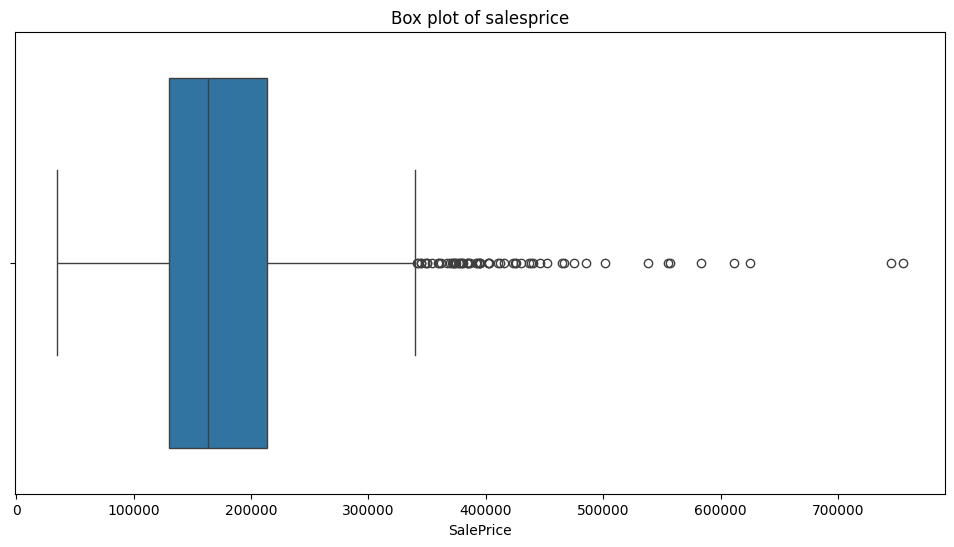

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x= df['SalePrice'])
plt.title("Box plot of salesprice")
plt.show()

# left side of blue box start is lower Q1
# right side of blue box end is upper Q3
# the line between blue box is median 
#left whisker = Q1 - 1.5*IQR
#right whisker = Q3 + 1.5*IQR

##### 2 : Inter-Quartile Range (IQR)

In [39]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = data[(data[col]< lower) | (data[col] > upper)]
    return outliers[[col]]

In [40]:
outlier_saleprice = detect_outliers_iqr(df, "SalePrice")

In [41]:
df.shape[0]

1460

In [42]:
len(outlier_saleprice)
print(outlier_saleprice.min())
print(outlier_saleprice.max())

SalePrice    341000
dtype: int64
SalePrice    755000
dtype: int64


##### 3 : Z-Score

In [43]:
# how many standard deviation away a value is 
# 68% --> 1 SD away
# 95% --> 2 SD away
# 99.7% --> 3 SD away
# 99% --> 2.58

# |z|  >  3,   then we generally say that the value is outlier

In [44]:
from scipy.stats import zscore

check the data is normal or not

In [45]:
import scipy.stats as stats

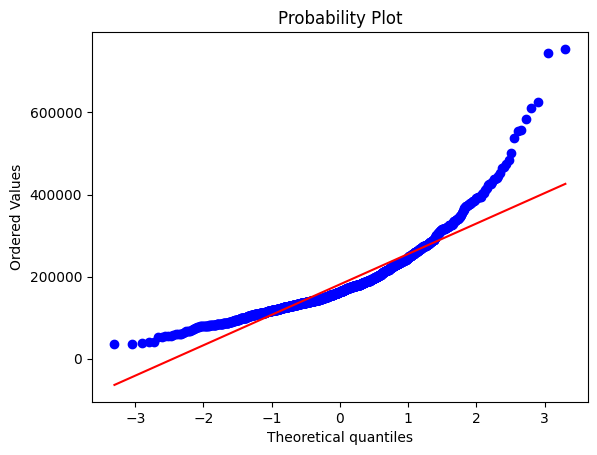

In [46]:
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.show()                                            
# if graph follows red line then it is normal otherwise not

In [47]:
df["SalePrice_zscore"] = zscore(df["SalePrice"])
outlier_z = df[df["SalePrice_zscore"].abs() > 3]

In [48]:
len(outlier_z)

22

In [49]:
outlier_z

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_zscore
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,10,2006,New,Partial,438780,3.246967
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,501837,4.040982
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000,3.703050
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,New,Partial,437154,3.226492
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2008,New,Partial,426000,3.086040
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,Normal,555000,4.710413
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,New,Partial,440000,3.262329
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,430000,3.136409
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2008,New,Partial,446261,3.341168
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950,3.412804


##### 4 : Winsorization (capping extreme values)

THEORY ---> Let fold = 0.05 (two-tailed)
- anything below the 5th percentile becomes --> 5th percentile value
- anything above the 95th percentile becomes --> 95th percentile value

In winsorization the outliers are not removed instead they takes values of upper and lower. (which maintains the shape of the dataset)

In [50]:
!pip install feature_engine

  Using cached feature_engine-1.9.3-py3-none-any.whl.metadata (10 kB)
Using cached feature_engine-1.9.3-py3-none-any.whl (229 kB)
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------

In [51]:
from feature_engine.outliers import Winsorizer

In [52]:
col_name = "LotArea"

In [53]:
winsor = Winsorizer(capping_method= "quantiles", tail="both", fold=0.05, variables=[col_name])
df_winsor = winsor.fit_transform(df)

In [54]:
print(df.shape)
print(df_winsor.shape)

(1460, 82)
(1460, 82)


In [55]:
percentile_5 = df[col_name].quantile(0.05)
percentile_95 = df[col_name].quantile(0.95)

In [56]:
print(f"5th percentile of {col_name} : {percentile_5}")
print(f"95th percentile of {col_name} : {percentile_95}")

5th percentile of LotArea : 3311.7000000000003
95th percentile of LotArea : 17401.149999999998


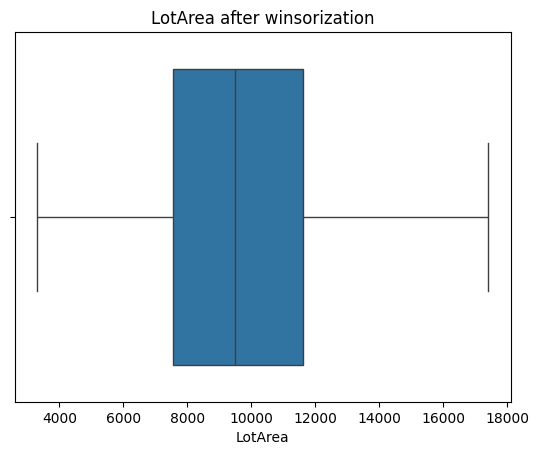

In [57]:
sns.boxplot(x= df_winsor[col_name])
plt.title(f"{col_name} after winsorization")
plt.show()

In [58]:
def compare_outliers(original_df, modified_df, column):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.boxplot(x=original_df[column])
    plt.title(f"{column} before winsorization")

    plt.subplot(1,2,2)
    sns.boxplot(x=modified_df[column])
    plt.title(f"{column} after winsorization")

    plt.show()

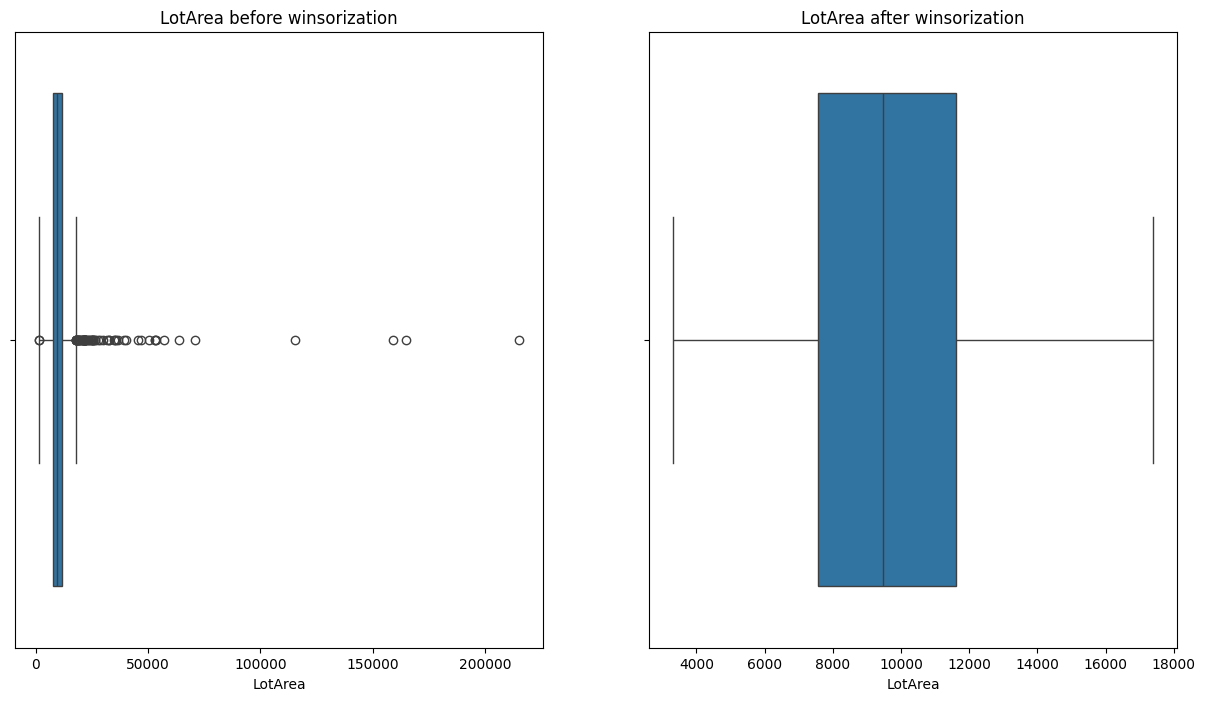

In [59]:
compare_outliers(df,df_winsor,"LotArea")

### Method 3 : Feature Scaling

THEORY ---> If one of the feature has very big numerical value compared to others then it will contribute more toward the formula and it will dominate and make the other feature as negligible , that's why we scale the features.

##### 1. MIN-MAX Scaling (Normalization)

- scales values into range [0,1]
- Sensitive Outliers

- formula is ----->  X(new) = [X(old) - X(min)] / [X(max)- X(min)]

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
def summary_stats(series):
    return{
        "mean" : series.mean(),
        "std" : series.std(),
        "skewness" : series.skew(),
    }

def compare_distribution(original, transformed, title):
    fig, axes = plt.subplots(1,2, figsize= (12,4))
    sns.histplot(original,bins=30,kde=True, ax=axes[0])
    axes[0].set_title(f"{title} - Before")
    sns.histplot(transformed, bins=30, kde=True, ax= axes[1])
    axes[1].set_title(f"{title} - After")
    plt.show()

Before : {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After : {'mean': np.float64(0.1679793094795433), 'std': np.float64(0.0831669581317918), 'skewness': np.float64(2.1635691423248846)}


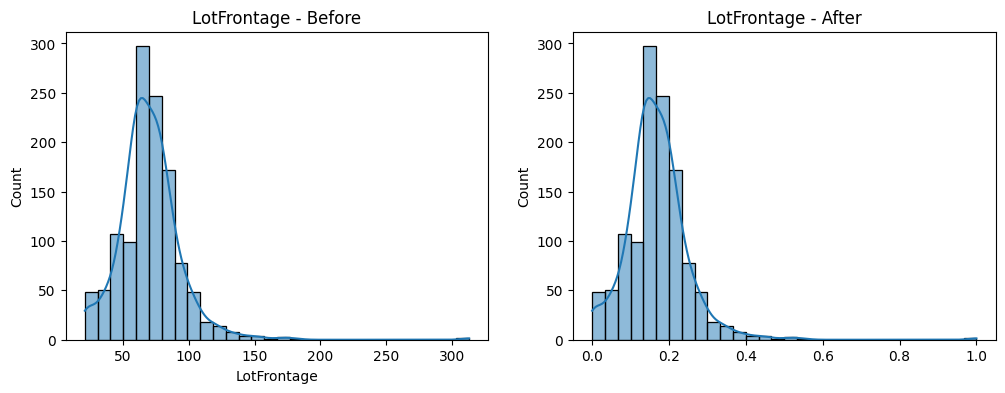

In [62]:
col = "LotFrontage"
scaler = MinMaxScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before : {summary_stats(df[col].dropna())}")
print(f"After : {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col )

In [63]:
lot_scaled.flatten()

array([0.15068493, 0.20205479, 0.1609589 , ..., 0.15410959, 0.1609589 ,
       0.18493151], shape=(1460,))

##### 2. Standardization (Z-Score Scaling)

- If data looks like normal data then we use standardization.
- formula is -----> X(new) = [X(old) - meu ] / sigma
- mean = 0 and Standard Deviation = 1
- Handles Outlier better than MIN-MAX Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
def summary_stats(series):
    return{
        "mean" : series.mean(),
        "std" : series.std(),
        "skewness" : series.skew(),
    }

def compare_distribution(original, transformed, title):
    fig, axes = plt.subplots(1,2, figsize= (12,4))
    sns.histplot(original,bins=30,kde=True, ax=axes[0])
    axes[0].set_title(f"{title} - Before")
    sns.histplot(transformed, bins=30, kde=True, ax= axes[1])
    axes[1].set_title(f"{title} - After")
    plt.show()


Before : {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After : {'mean': np.float64(-2.677107310003708e-16), 'std': np.float64(1.0004165798972613), 'skewness': np.float64(2.1635691423248846)}


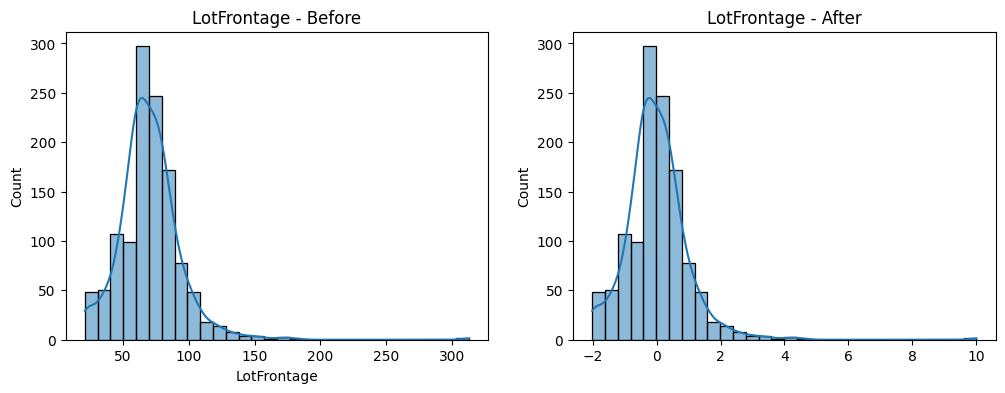

In [66]:
col = "LotFrontage"
scaler = StandardScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before : {summary_stats(df[col].dropna())}")
print(f"After : {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col )

In [67]:
lot_scaled.flatten()

array([-0.20803433,  0.40989452, -0.08444856, ..., -0.16683907,
       -0.08444856,  0.20391824], shape=(1460,))

##### 3. Robust Scaler (Median and IQR Based)

- formula ----> X(new) = [X(old) - Median(X)] / IQR(X)


In [68]:
from sklearn.preprocessing import RobustScaler

In [69]:
def summary_stats(series):
    return{
        "mean" : series.mean(),
        "std" : series.std(),
        "skewness" : series.skew(),
    }

def compare_distribution(original, transformed, title):
    fig, axes = plt.subplots(1,2, figsize= (12,4))
    sns.histplot(original,bins=30,kde=True, ax=axes[0])
    axes[0].set_title(f"{title} - Before")
    sns.histplot(transformed, bins=30, kde=True, ax= axes[1])
    axes[1].set_title(f"{title} - After")
    plt.show()

Before : {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After : {'mean': np.float64(0.04999801752507831), 'std': np.float64(1.156416751165867), 'skewness': np.float64(2.163569142324884)}


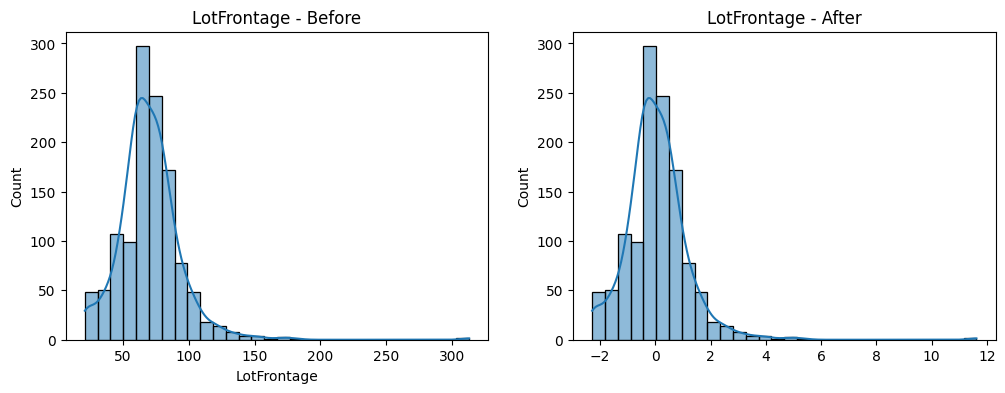

In [70]:
col = "LotFrontage"
scaler = RobustScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before : {summary_stats(df[col].dropna())}")
print(f"After : {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col )

In [71]:
lot_scaled.flatten()

array([-0.19047619,  0.52380952, -0.04761905, ..., -0.14285714,
       -0.04761905,  0.28571429], shape=(1460,))

##### 4. Log Transformation

- this works well when the data is right skewness
- formula ----> X(new) = log(1+X)

Before : {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After : {'mean': np.float64(4.207108941714102), 'std': np.float64(0.3462283309333295), 'skewness': np.float64(-0.7287278423055492)}


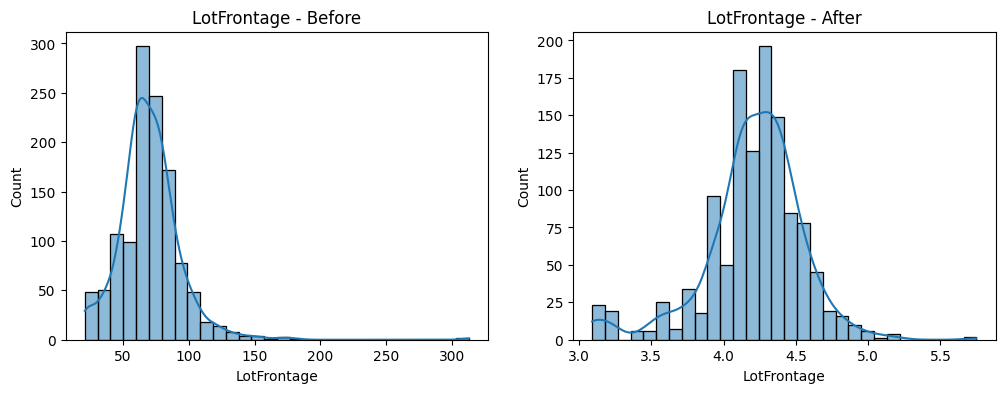

In [72]:
col = "LotFrontage"
log_trans = np.log1p(df[col].dropna())
print(f"Before : {summary_stats(df[col].dropna())}")
print(f"After : {summary_stats(log_trans)}")
compare_distribution(df[col].dropna(), log_trans, col )

##### 5. Others

- Square root ---> X(new) = sqrt(X(old))
- Cube root ---> X(new) = cuberoot(X(old))
- Box cox (lambda) ----> 
    - X(new) = [X(old)^lambda - 1] / lambda   ...when lambda != 0
    - X(new) = log(X)                         ...whwn lambda = 0
- Yeo-Johnson

In [73]:
# Yeo-Johnson

from sklearn.preprocessing import PowerTransformer

Before : {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.163569142324884)}
After : {'mean': np.float64(-7.3805334126621565e-16), 'std': np.float64(1.0004165798972613), 'skewness': np.float64(0.11527708161436032)}


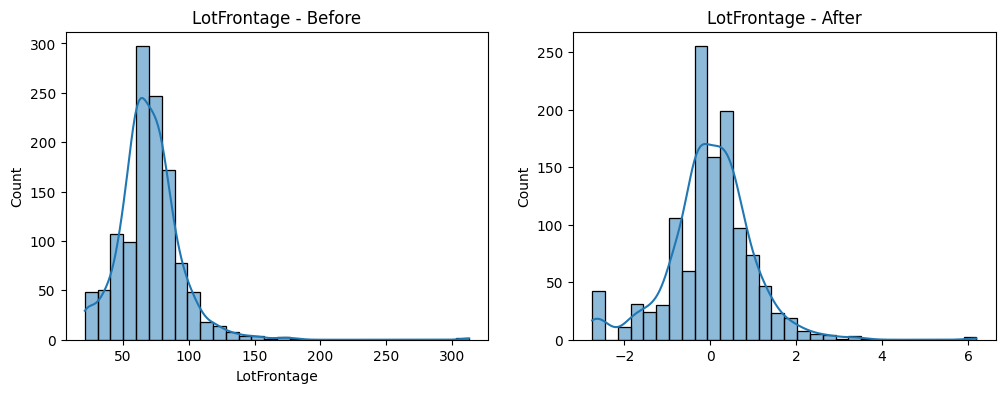

In [74]:
col = "LotFrontage"
pt = PowerTransformer(method="yeo-johnson")
lot_trans = pt.fit_transform(df[[col]])
print(f"Before : {summary_stats(df[col])}")
print(f"After : {summary_stats(pd.Series(lot_trans.flatten()))}")
compare_distribution(df[col].dropna(), lot_trans.flatten(), col )

In [75]:
lot_scaled.flatten()

array([-0.19047619,  0.52380952, -0.04761905, ..., -0.14285714,
       -0.04761905,  0.28571429], shape=(1460,))

Before : {'mean': np.float64(10516.828082191782), 'std': np.float64(9981.26493237915), 'skewness': np.float64(12.207687851233496)}
After : {'mean': np.float64(9.490125580357503e-16), 'std': np.float64(1.0003426417780865), 'skewness': np.float64(0.026569113431683063)}


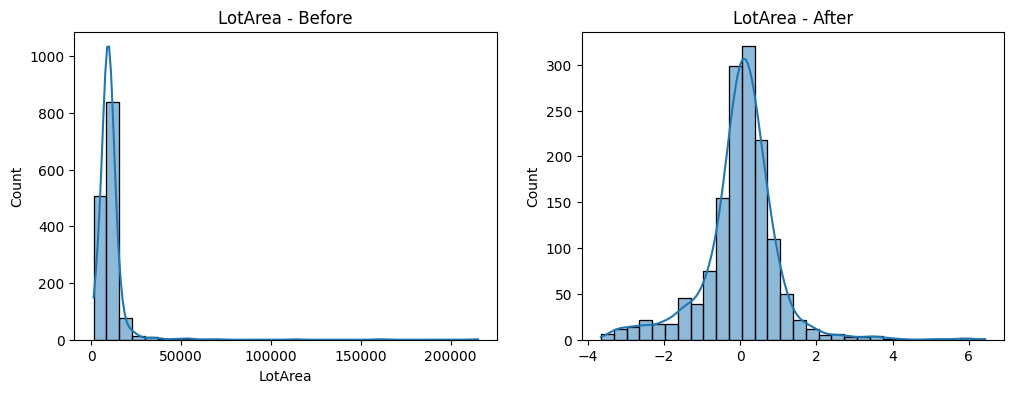

In [76]:
col = "LotArea"
pt = PowerTransformer(method="yeo-johnson")
lot_trans = pt.fit_transform(df[[col]])
print(f"Before : {summary_stats(df[col])}")
print(f"After : {summary_stats(pd.Series(lot_trans.flatten()))}")
compare_distribution(df[col].dropna(), lot_trans.flatten(), col )

### Method 4 : Data Encoding

- To convert the textual data into numerical data so that we can perform operations on them  we use data encoding

In [77]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### 1. Label Encoding (Nominal)

- data order dependant
- It doesn't sorts by alphabetical order , whatever comes first in dataframe gets 0.

In [78]:
from sklearn.preprocessing import LabelEncoder

col = "MSZoning"
print("Before:", df[col].unique())

# Method 1 : Using pandas
df["MSZoning_label"] = pd.factorize(df[col])[0]

# Method 2 : Using LabelEncoder  (Sort alphabetically before assigning numbers)
le = LabelEncoder()
df["MSZoning_label_sklearn"] = le.fit_transform(df[col])

print("After pandas factorize:", df["MSZoning_label"].unique())
print("After sklearn:", df["MSZoning_label_sklearn"].unique())

Before: ['RL' 'RM' 'C (all)' 'FV' 'RH']
After pandas factorize: [0 1 2 3 4]
After sklearn: [3 4 0 1 2]


##### 2. Label Encoding (Ordinal) / Ordinal Encoder

- first arranged in certain order and then encoding.

In [79]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_order = [['C (all)', 'RM', 'RH', 'RL', 'FV']]

oe = OrdinalEncoder(categories = ordinal_order)
df["MSZoning_ordinal"] = oe.fit_transform(df[[col]])

print("Before :", df[col].unique())
print("After Pandas factorize :", df["MSZoning_label"].unique())
print("After OrdinalEncoder (with order) :", df["MSZoning_ordinal"].unique())

Before : ['RL' 'RM' 'C (all)' 'FV' 'RH']
After Pandas factorize : [0 1 2 3 4]
After OrdinalEncoder (with order) : [3. 1. 0. 4. 2.]


##### 3. One Hot Encoding (OHE)

- Converting category into binary dummy variables

- In label encoding(ordinal/nominal) we can compare which create issue but in OHE there is no comparison issue.

- It increases the number of feature in dataset

In [80]:
col = "MSZoning"
print("Before:", df[col].unique())

# method 1 : using pandas
mszoning_ohe_pandas = pd.get_dummies(df[col], prefix="MSZoning")

# method 2 : sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop=None)
mszoning_ohe_sklearn = ohe.fit_transform(df[[col]])

ohe_df = pd.DataFrame(mszoning_ohe_sklearn, columns=ohe.get_feature_names_out([col]))


Before: ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [81]:
pandas_comparison = pd.concat([df[col], mszoning_ohe_pandas], axis=1)

sklearn_comparison = pd.concat([df[col], ohe_df], axis=1)

unique_pandas_ohe = pandas_comparison.drop_duplicates(subset=[col]).reset_index(drop = True)
unique_sklearn_ohe = sklearn_comparison.drop_duplicates(subset=[col]).reset_index(drop=True)


print("unique values and OHE (pandas_get dummies)")
print(unique_pandas_ohe)
print("==="*30)
print("unique values and OHE (scikit onehotencoder)")
print(unique_sklearn_ohe)


unique values and OHE (pandas_get dummies)
  MSZoning  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0       RL             False        False        False         True   
1       RM             False        False        False        False   
2  C (all)              True        False        False        False   
3       FV             False         True        False        False   
4       RH             False        False         True        False   

   MSZoning_RM  
0        False  
1         True  
2        False  
3        False  
4        False  
unique values and OHE (scikit onehotencoder)
  MSZoning  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0       RL               0.0          0.0          0.0          1.0   
1       RM               0.0          0.0          0.0          0.0   
2  C (all)               1.0          0.0          0.0          0.0   
3       FV               0.0          1.0          0.0          0.0   
4       RH               0.0

In [82]:
df_sparse_ohe = pd.DataFrame({'color': ['Red', 'Green', 'Blue', 'Red']})

ohe_sparse = OneHotEncoder(sparse_output=True)

color_encoded_sparse = ohe_sparse.fit_transform(df_sparse_ohe[['color']])

print("Sparse output (type) : ", type(color_encoded_sparse))
print("\nSparse Matrix Output :\n", color_encoded_sparse)

print("\nSparse Matrix as a dense array:\n", color_encoded_sparse.toarray())

Sparse output (type) :  <class 'scipy.sparse._csr.csr_matrix'>

Sparse Matrix Output :
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 3)>
  Coords	Values
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0

Sparse Matrix as a dense array:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [83]:
ohe.get_feature_names_out([col])

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM'], dtype=object)

##### 4. Target Encoding

- uses mean to form groups and then we target which we want to get.

In [84]:
# installation of category encoder

!pip install category_encoders 

In [85]:
import category_encoders as ce

col = "Neighborhood"
print("Before :", df[col].unique())

Before : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [86]:
target_enc = ce.TargetEncoder(cols = [col])
df["Neighborhood_target"] = target_enc.fit_transform(df[col], df["SalePrice"])


unique_neighborhood_targets = df[[col, "Neighborhood_target"]].drop_duplicates().reset_index(drop=True)

print("\n--- Unique Neighborhood value and their target encoded values---")
print(unique_neighborhood_targets)


--- Unique Neighborhood value and their target encoded values---
   Neighborhood  Neighborhood_target
0       CollgCr        197965.734807
1       Veenker        197643.209810
2       Crawfor        209344.287867
3       NoRidge        318453.591177
4       Mitchel        157555.763763
5       Somerst        225319.439258
6        NWAmes        189009.693995
7       OldTown        128230.118126
8       BrkSide        126061.309722
9        Sawyer        136991.546950
10      NridgHt        315819.259117
11        NAmes        145847.080044
12      SawyerW        186444.004409
13       IDOTRR        112604.177463
14      MeadowV        145878.781837
15      Edwards        128237.373454
16       Timber        233548.253290
17      Gilbert        192821.904993
18      StoneBr        261578.109175
19      ClearCr        202754.908915
20      NPkVill        171374.451021
21      Blmngtn        186857.589353
22       BrDale        150249.918749
23        SWISU        157062.431877
24      B

##### 5. Frequency Encoding

- particular feature mai koi data kitni baar repeat kr raha hai usko numbers mai batata hai 

In [87]:
col = "Neighborhood"
print("Before:", df[col].unique())


# Method 1 : using pandas map

freq_encoding = df[col].value_counts().to_dict()
df["Neighborhood_freq"] = df[col].map(freq_encoding)


# Method 2 : Category_encoders
count_enc = ce.CountEncoder(cols = [col])
df["Neighborhood_freq_ce"] = count_enc.fit_transform(df[col])

unique_neighborhood_frquency_encoding = df[[col, "Neighborhood_freq_ce"]].drop_duplicates().reset_index(drop=True)

print("\n--- Unique Neighborhood values and their frequencies encoded values ---")
print(unique_neighborhood_frquency_encoding)



Before: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

--- Unique Neighborhood values and their frequencies encoded values ---
   Neighborhood  Neighborhood_freq_ce
0       CollgCr                   150
1       Veenker                    11
2       Crawfor                    51
3       NoRidge                    41
4       Mitchel                    49
5       Somerst                    86
6        NWAmes                    73
7       OldTown                   113
8       BrkSide                    58
9        Sawyer                    74
10      NridgHt                    77
11        NAmes                   225
12      SawyerW                    59
13       IDOTRR                    37
14      MeadowV                    17
15      Edwards                   100
16       Timber            

### Method 5 : Feature Selection

In [88]:
!pip install statsmodels

In [89]:
import statsmodels.api as sm

df_numeric = df.select_dtypes(include=['number'])       # select all the numerical columns from dataset
total_rows = len(df_numeric)                            # total row having numerical values
missing_counts = df_numeric.isnull().sum()              # check for total missing values
missing_percentages = (missing_counts/total_rows)*100   # percentage of value missing


# Drop columns which have > 30% missing values
columns_to_drop = missing_percentages[missing_percentages > 30].index.tolist()
df_cleaned = df_numeric.drop(columns=columns_to_drop)

print("Dropping columns with >30% missing values:")
print(columns_to_drop)
print("-" * 50)

# impute the remaining columns null values (mean)
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        mean_val = df_cleaned[col].mean()
        df_cleaned[col] = df_cleaned[col].fillna(mean_val)
        print(f" Imputed missing values in '{col}' with the mean({mean_val}).")
print("-"*50)

Dropping columns with >30% missing values:
[]
--------------------------------------------------
 Imputed missing values in 'LotFrontage' with the mean(70.04995836802665).
 Imputed missing values in 'MasVnrArea' with the mean(103.68526170798899).
 Imputed missing values in 'GarageYrBlt' with the mean(1978.5061638868744).
--------------------------------------------------


##### 1. Backward Elimination

P-Value: measure the probability of observing the data that you have
 - Ho : states that coefficient for that feature is 0.
    - P-value < 0.05  (reject Ho)
    - P-value > 0.05  (fail to reject Ho)

- remove the irrelevant column 
- use of P-Value
- remove column which has highest P-Value
- train the model again and repeat the process

In [90]:
# perform backward elimination

x = df_cleaned.drop(columns=["SalePrice","Id"])
y = df_cleaned["SalePrice"]



print(x.shape)
x = sm.add_constant(x)          # addition of constant 
print(x.shape)
print(x.columns)

# y = mo + m1x1 + m2x2

threshold = 0.05
model_summary_flag = False

print("\nPerforming Backward Elimination:")
while True:
    model = sm.OLS(y,x).fit()
    if not model_summary_flag:
        print(model.summary())
        model_summary_flag = True
    p_values = model.pvalues.drop("const")
    max_p = p_values.max()

    if max_p > threshold:
        excluded_feature = p_values.idxmax()
        print(f"Removing {excluded_feature} with p-value {max_p :.4f}")
        x = x.drop(columns = [excluded_feature])
    else:
        break

print("\n Final features:", x.columns.tolist())


(1460, 43)
(1460, 44)
Index(['const', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_zscore', 'MSZoning_label',
       'MSZoning_label_sklearn', 'MSZoning_ordinal', 'Neighborhood_target',
       'Neighborhood_freq', 'Neighborhood_freq_ce'],
      dtype='object')

Performing Backward Elimination:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                          

##### 2. Forward Selection

R Square value: ranges from 0 to 1.   

- let if  A = actual target column , B = model prediction, C = mean
    - R square = 1 - (sum of square of residual/sum of square of total)
    - sum of square of residual = summation of (A-B)Square.
    - sum of square of total = summation of (A-C)Square.
    - suppose if R square comes as 0.5 then we read it as "our model explain 50% of the variance of the data"

- add the relevant one/ filter the irrelevant one
-  use R square value
- higher R Square value means column is needed.

In [91]:
# perform forward selection using p value.

def forward_selection(x,y, threshold=0.05):
    selectd_features = []
    remaining_features = list(x.columns)
    while remaining_features:
        pvals = {}
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(x[selectd_features + [feature]])).fit()
            pvals[feature] = model.pvalues[feature]

    # find minimum from the value and get the key of that values
        min_pval_feature = min(pvals, key=pvals.get)
        min_pval = pvals[min_pval_feature]
        if min_pval < threshold:
            selectd_features.append(min_pval_feature)                           # add the feature we selected to select_features
            remaining_features.remove(min_pval_feature)                         # remove the feature we select from x
            print(f"selected {min_pval_feature} with p_value {min_pval:.4f}")
        else:
            break
    return selectd_features

x_fs = df_cleaned.drop(columns=["SalePrice","Id", "SalePrice_zscore"])
y_fs = df_cleaned["SalePrice"]

selected = forward_selection(x_fs, y_fs)
print("\nFinal feature (Forward Selection):", selected)

selected OverallQual with p_value 0.0000
selected GrLivArea with p_value 0.0000
selected Neighborhood_target with p_value 0.0000
selected BsmtFinSF1 with p_value 0.0000
selected MSSubClass with p_value 0.0000
selected GarageCars with p_value 0.0000
selected OverallCond with p_value 0.0000
selected BedroomAbvGr with p_value 0.0000
selected BsmtFullBath with p_value 0.0000
selected LotArea with p_value 0.0001
selected YearBuilt with p_value 0.0000
selected ScreenPorch with p_value 0.0002
selected TotRmsAbvGrd with p_value 0.0003
selected WoodDeckSF with p_value 0.0010
selected MasVnrArea with p_value 0.0016
selected TotalBsmtSF with p_value 0.0047
selected KitchenAbvGr with p_value 0.0311

Final feature (Forward Selection): ['OverallQual', 'GrLivArea', 'Neighborhood_target', 'BsmtFinSF1', 'MSSubClass', 'GarageCars', 'OverallCond', 'BedroomAbvGr', 'BsmtFullBath', 'LotArea', 'YearBuilt', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'MasVnrArea', 'TotalBsmtSF', 'KitchenAbvGr']


In [92]:
# perform forward selection using R-Square value.

def forward_selection_r_squared(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    best_r_squared = -1

    while remaining_features:
        best_candidate = None
        current_best_r_squared = -1

        for feature in remaining_features:
            # Create a model with the selected features plus the current candidate
            model_features = selected_features + [feature]
            model = sm.OLS(y, sm.add_constant(X[model_features])).fit()

            # Check if this model improves R-squared
            if model.rsquared > current_best_r_squared:
                current_best_r_squared = model.rsquared
                best_candidate = feature

        # If adding the best candidate improves R-squared, add it
        if current_best_r_squared > best_r_squared:
            selected_features.append(best_candidate)
            remaining_features.remove(best_candidate)
            best_r_squared = current_best_r_squared
            print(f"Selected {best_candidate} with R-squared {best_r_squared:.4f}")
        else:
            # Stop if no feature improves the model
            break

    return selected_features

X_fs = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_fs = df_cleaned["SalePrice"]

selected = forward_selection(X_fs, y_fs)
selected_r_squared = forward_selection_r_squared(X_fs, y_fs)
print("\nFinal features (Forward Selection):", selected)
print("\nFinal features (Forward Selection R-Squared):", selected_r_squared)


selected OverallQual with p_value 0.0000
selected GrLivArea with p_value 0.0000
selected Neighborhood_target with p_value 0.0000
selected BsmtFinSF1 with p_value 0.0000
selected MSSubClass with p_value 0.0000
selected GarageCars with p_value 0.0000
selected OverallCond with p_value 0.0000
selected BedroomAbvGr with p_value 0.0000
selected BsmtFullBath with p_value 0.0000
selected LotArea with p_value 0.0001
selected YearBuilt with p_value 0.0000
selected ScreenPorch with p_value 0.0002
selected TotRmsAbvGrd with p_value 0.0003
selected WoodDeckSF with p_value 0.0010
selected MasVnrArea with p_value 0.0016
selected TotalBsmtSF with p_value 0.0047
selected KitchenAbvGr with p_value 0.0311
Selected OverallQual with R-squared 0.6257
Selected GrLivArea with R-squared 0.7142
Selected Neighborhood_target with R-squared 0.7690
Selected BsmtFinSF1 with R-squared 0.7930
Selected MSSubClass with R-squared 0.8079
Selected GarageCars with R-squared 0.8145
Selected OverallCond with R-squared 0.8184


##### 3. Recursive Feature Elimination (RFE)

- method uses to select features
- It uses ML algorithms (leinear regression or random forest)

In [93]:
# RFE using linear regression algorithm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X_rfe = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_rfe = df_cleaned["SalePrice"]

model = LinearRegression() # machine learning algo

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_rfe, y_rfe)

print(rfe.estimator_.coef_)

selected_features = X_rfe.columns[rfe.support_]
ranking = dict(zip(X_rfe.columns, list(rfe.ranking_)))

print("Selected Features (RFE):", list(selected_features))
print("Ranking of all features:", ranking)

# 1 : important features
# 2,3,4 : not selected (The higher the number, the less important)
# order defines the order in which they are eliminated

[ 24879.75757171  21975.79249333  11660.32674761  14308.63818295
 -10577.66786345 -32410.51623081  14666.62670254  11175.62498599
  17682.93207158   7053.03125961]
Selected Features (RFE): ['OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSZoning_ordinal']
Ranking of all features: {'MSSubClass': np.int64(5), 'LotFrontage': np.int64(22), 'LotArea': np.int64(32), 'OverallQual': np.int64(1), 'OverallCond': np.int64(2), 'YearBuilt': np.int64(6), 'YearRemodAdd': np.int64(12), 'MasVnrArea': np.int64(16), 'BsmtFinSF1': np.int64(23), 'BsmtFinSF2': np.int64(28), 'BsmtUnfSF': np.int64(29), 'TotalBsmtSF': np.int64(21), '1stFlrSF': np.int64(10), '2ndFlrSF': np.int64(11), 'LowQualFinSF': np.int64(25), 'GrLivArea': np.int64(18), 'BsmtFullBath': np.int64(1), 'BsmtHalfBath': np.int64(1), 'FullBath': np.int64(1), 'HalfBath': np.int64(3), 'BedroomAbvGr': np.int64(1), 'KitchenAbvGr': np.int64(1), 'TotRmsAbvGrd': np.in

In [94]:
# RFE using Random forest algorithm

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X_rfe = df_cleaned.drop(columns=["SalePrice", "Id", "SalePrice_zscore"])
y_rfe = df_cleaned["SalePrice"]

model = RandomForestRegressor(n_estimators=100, random_state=42) # machine learning algo

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_rfe, y_rfe)

selected_features = X_rfe.columns[rfe.support_]
ranking = dict(zip(X_rfe.columns, list(rfe.ranking_)))

print("Selected Features (RFE):", list(selected_features))
print("Ranking of all features:", ranking)

# 1 : important features
# 2,3,4 : not selected (The higher the number, the less important)
# order defines the order in which they are eliminated

Selected Features (RFE): ['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'Neighborhood_target']
Ranking of all features: {'MSSubClass': np.int64(17), 'LotFrontage': np.int64(4), 'LotArea': np.int64(1), 'OverallQual': np.int64(1), 'OverallCond': np.int64(8), 'YearBuilt': np.int64(3), 'YearRemodAdd': np.int64(2), 'MasVnrArea': np.int64(9), 'BsmtFinSF1': np.int64(1), 'BsmtFinSF2': np.int64(25), 'BsmtUnfSF': np.int64(6), 'TotalBsmtSF': np.int64(1), '1stFlrSF': np.int64(1), '2ndFlrSF': np.int64(1), 'LowQualFinSF': np.int64(33), 'GrLivArea': np.int64(1), 'BsmtFullBath': np.int64(22), 'BsmtHalfBath': np.int64(31), 'FullBath': np.int64(11), 'HalfBath': np.int64(21), 'BedroomAbvGr': np.int64(18), 'KitchenAbvGr': np.int64(26), 'TotRmsAbvGrd': np.int64(5), 'Fireplaces': np.int64(15), 'GarageYrBlt': np.int64(14), 'GarageCars': np.int64(1), 'GarageArea': np.int64(1), 'WoodDeckSF': np.int64(10), 'OpenPorchSF': np.int64(7), 'Enc

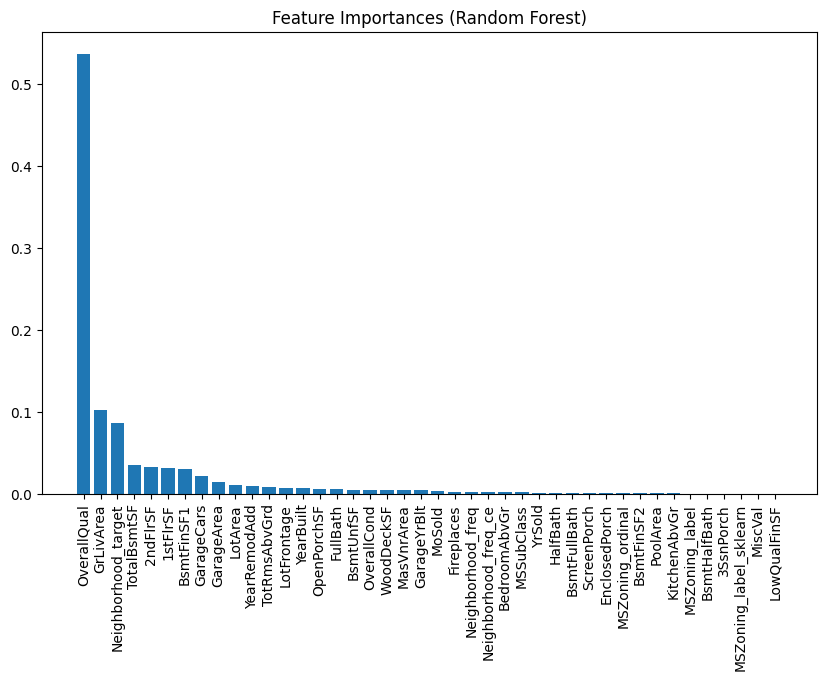

In [95]:
# Feature importance Plot (without using RFE)

rf = RandomForestRegressor(n_estimators=100, random_state=42) # machine learning algo
rf.fit(X_rfe, y_rfe)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(X_rfe.columns)), importances[indices], align='center')
plt.xticks(range(len(X_rfe.columns)), X_rfe.columns[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

##### 4. COVARIANCE & CORRELATION

In [96]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv") 
df_numeric = df.select_dtypes(include=['number'])

In [97]:
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [98]:
house_features = df_numeric[["LotArea","OverallQual","OverallCond","YearBuilt","GrLivArea","GarageCars","SalePrice"]]

In [99]:
house_features.corr(method="pearson")

,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,GarageCars,SalePrice
LotArea,1.000000,0.105806,-0.005636,0.014228,0.263116,0.154871,0.263843
OverallQual,0.105806,1.000000,-0.091932,0.572323,0.593007,0.600671,0.790982
OverallCond,-0.005636,-0.091932,1.000000,-0.375983,-0.079686,-0.185758,-0.077856
YearBuilt,0.014228,0.572323,-0.375983,1.000000,0.199010,0.537850,0.522897
GrLivArea,0.263116,0.593007,-0.079686,0.199010,1.000000,0.467247,0.708624
GarageCars,0.154871,0.600671,-0.185758,0.537850,0.467247,1.000000,0.640409
SalePrice,0.263843,0.790982,-0.077856,0.522897,0.708624,0.640409,1.000000


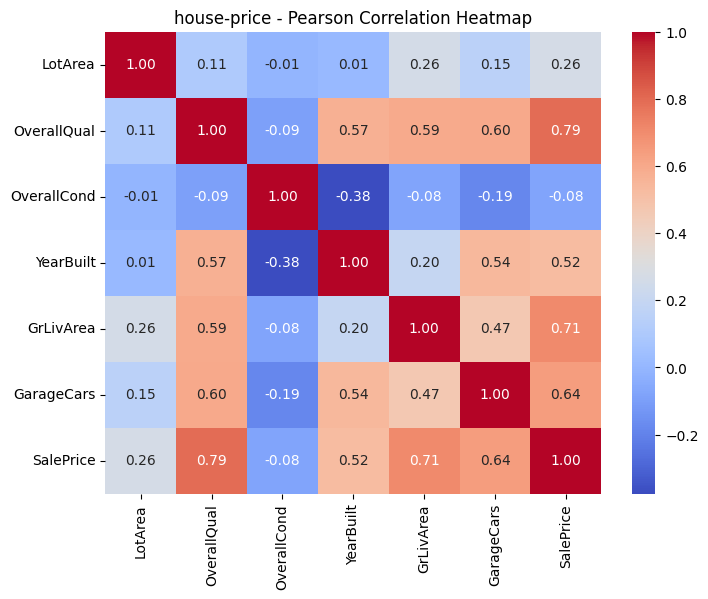

In [100]:
dataset_name = "house-price"
plt.figure(figsize=(8,6))
sns.heatmap(house_features.corr(method="pearson"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"{dataset_name} - Pearson Correlation Heatmap")
plt.show()

##### 5. VIF (Variance Inflation Factor)

- detect milti-collinarity in regression features

- formula :  VIF = 1/(1-R square)

    - VIF = 1   (No multicollinearity)
    - VIF = 1-5 (Moderate correlaties)
    - VIF > 10  (strong multicollinearity)


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = house_features.drop(columns=["SalePrice"])
X = sm.add_constant(X)

# print(X.shape)
# (1460, 7)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print(" High multicollinearity detected in these features:")
    print(high_vif)

       Feature          VIF
0        const  8703.125689
1      LotArea     1.086326
2  OverallQual     2.551486
3  OverallCond     1.217091
4    YearBuilt     2.078066
5    GrLivArea     1.837841
6   GarageCars     1.844446
 High multicollinearity detected in these features:
  Feature          VIF
0   const  8703.125689


### Method 6 : Data Sampling

Techniques to handle Imbalance in data :

In [102]:
# load of diabetes dataset

df1 = pd.read_csv("Diabetes_dataset/diabetic_data.csv")

In [103]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [105]:
print(df1["readmitted"].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [106]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)

   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   -----

In [107]:
from collections import Counter

In [108]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [109]:
def plot_class_distribution(y_old, y_new, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)

    sns.countplot(x=y_old, ax=ax1)
    ax1.set_title('Original Distribution')
    ax1.set_xlabel('Readmission Category')
    ax1.set_ylabel('Count')
    ax1.set_xticks(ticks=[0, 1], labels=['NO / >30 days', '<30 days'])
    
    sns.countplot(x=y_new, ax=ax2)
    ax2.set_title('Resampled Distribution')
    ax2.set_xlabel('Readmission Category')
    ax2.set_ylabel('Count')
    ax2.set_xticks(ticks=[0, 1], labels=['NO / >30 days', '<30 days'])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

##### 1. Random Under Sampling (RUS) :

- reduce the majority class by randomly removing samples and make it equal to minority class.
- Disadvantage ---> we are throwing out useful data


In [110]:
x = df1.drop(columns=['readmitted','encounter_id','patient_nbr'], errors='ignore')
y = df1['readmitted']

x = pd.get_dummies(x)           # it performs ONE HOT ENCODING

rus = RandomUnderSampler(sampling_strategy='not majority', random_state=42)     # rnadom_state is just like seeding in random number generation
rus_majority = RandomUnderSampler(sampling_strategy='majority', random_state=42)
rus_all = RandomUnderSampler(sampling_strategy='all', random_state=42)

# sampling statrategy
# 'majority' ---> resample the majority class only
# 'minority' ---> resample the minority class only
# 'not minority' ---> resample all classes except the minority
# 'not majority' ---> resample all classes except the majority
#  'all' ---> reample all classes

x_rus , y_rus = rus.fit_resample(x, y)
x_rus_maj, y_rus_maj = rus_majority.fit_resample(x,y)
x_rus_all, y_rus_all = rus_all.fit_resample(x,y)
print("Original distribution:", Counter(y))
print("Under-sampling distribution(not majority):", Counter(y_rus))
print("Under-sampling distribution(majority):", Counter(y_rus_maj))
print("Under-sampling distribution(all):", Counter(y_rus_all))


Original distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Under-sampling distribution(not majority): Counter({'NO': 54864, '<30': 11357, '>30': 11357})
Under-sampling distribution(majority): Counter({'>30': 35545, '<30': 11357, 'NO': 11357})
Under-sampling distribution(all): Counter({'<30': 11357, '>30': 11357, 'NO': 11357})


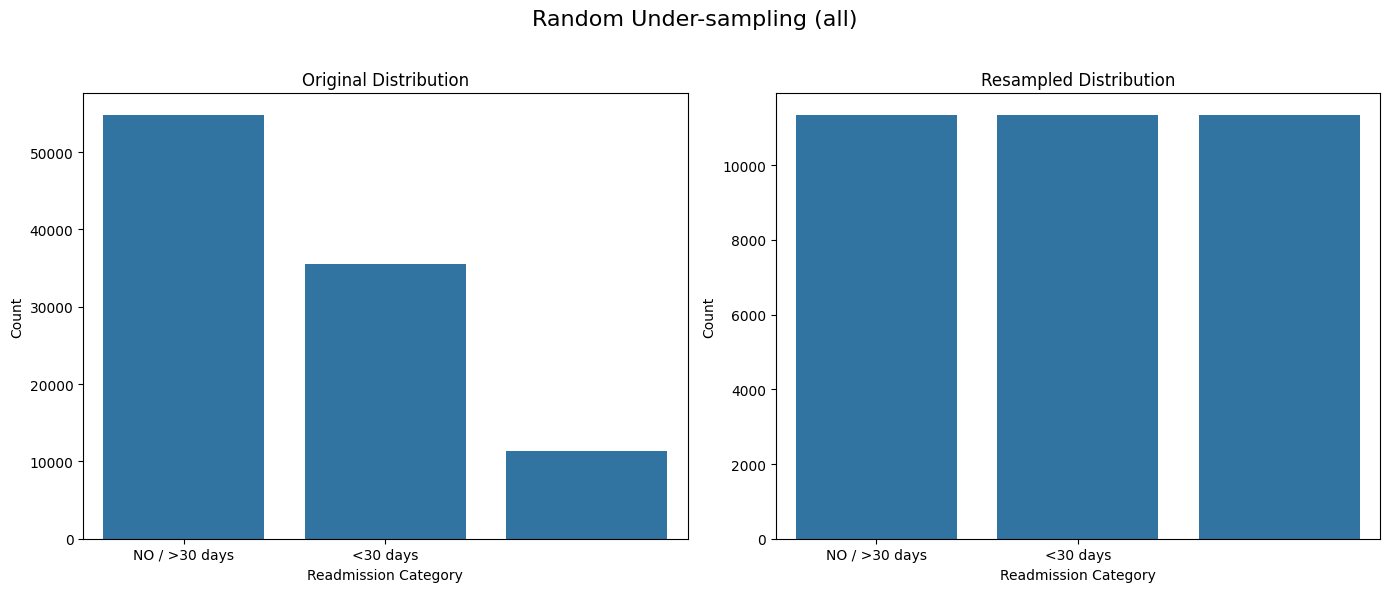

In [111]:
plot_class_distribution(y, y_rus_all, "Random Under-sampling (all)")

##### 2. Random Over Sampling (ROS) :

- duplicate samples in minority class and make it equal to majority class.
- Disadvantage ---> can causes overfitting.

Original distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Over-sampling distribution: Counter({'NO': 54864, '>30': 54864, '<30': 54864})


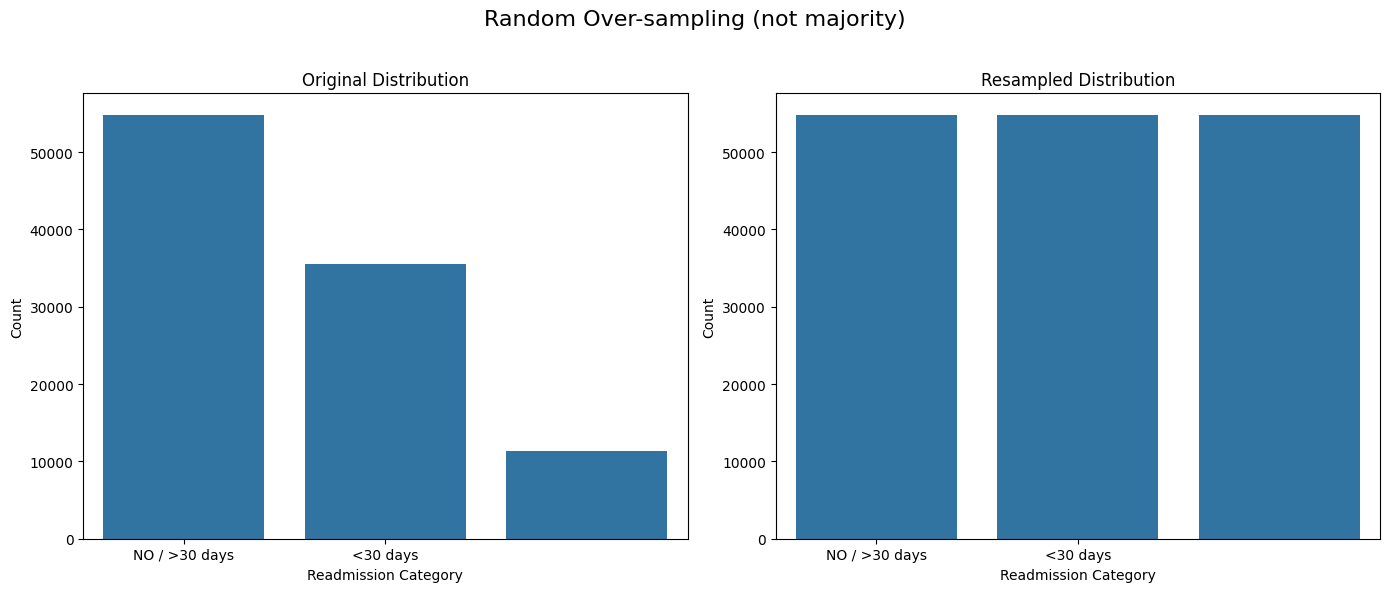

In [112]:
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_ros, y_ros = ros.fit_resample(x, y)
print("Original distribution:", Counter(y))
print("Over-sampling distribution:", Counter(y_ros))
plot_class_distribution(y, y_ros, "Random Over-sampling (not majority)")

##### 3. Synthetic Minority Oversampling Technique (SMOTE) :

- instead of duplicating data in minority class , create synthetic data by interpolating between minority sample.
- Better than ROS
- works only with numerical data

Original distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
SMOTE distribution: Counter({'NO': 54864, '>30': 54864, '<30': 54864})


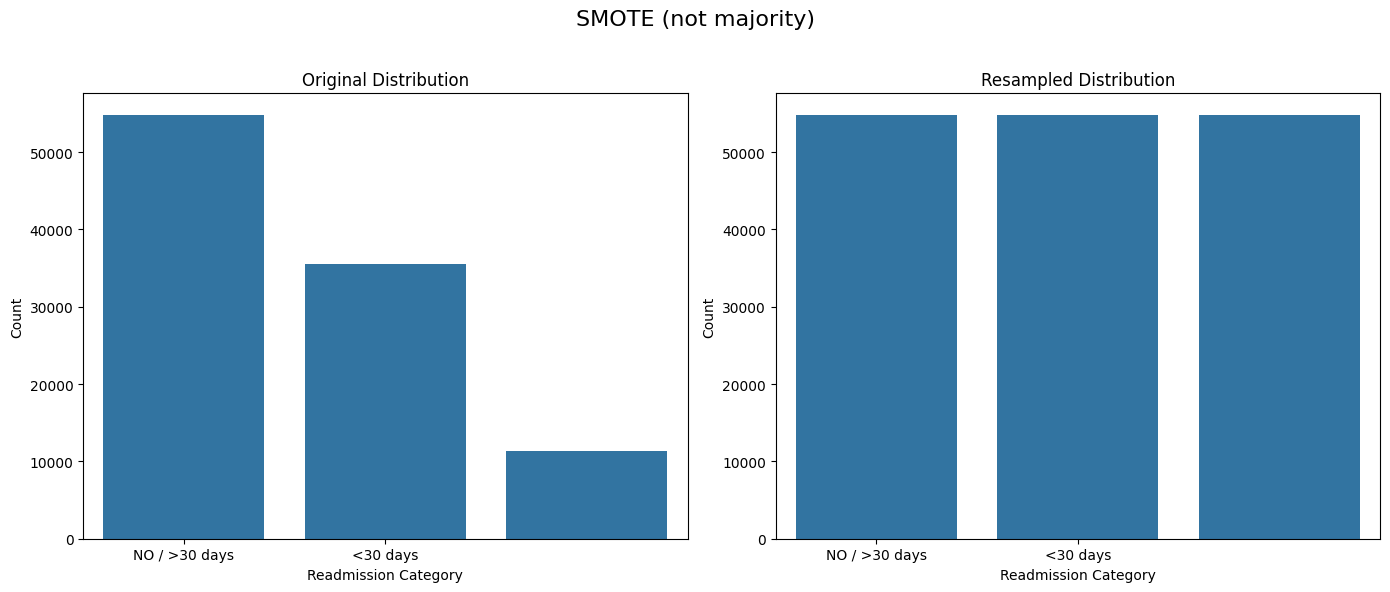

In [113]:
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_sm, y_sm = smote.fit_resample(x, y)
print("Original distribution:", Counter(y))
print("SMOTE distribution:", Counter(y_sm))
plot_class_distribution(y, y_sm, "SMOTE (not majority)")

##### 4. Adaptive Synthetic Sampling (ADASYN) :

- similar to SMOTE but more smarter
- generate more synthetic sample near boundaries.

In [116]:
adasyn = ADASYN(sampling_strategy='not majority', random_state=42)
X_asyn, y_asyn = adasyn.fit_resample(x, y)
print("Original distribution:", Counter(y))
print("ADASYN distribution:", Counter(y_asyn))
plot_class_distribution(y, y_asyn, "ADASYN (not majority)")

MemoryError: Unable to allocate 557. MiB for an array with shape (717, 101766) and data type int64